In [1]:
%matplotlib inline
import sys
import os
working_dir_path = os.getcwd()
genomagic_qa_repo_path = '/'.join(working_dir_path.split('/')[:-1])
sys.path.append(genomagic_qa_repo_path)
import redshift.redshift_queries as rs
bp_units = 1000000




#change this parameters
host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
#data_version='dm_gm_public_maize_232'
data_version = 'public_soy_v2_03'

WITH temp_var1 AS (SELECT sample1, analysis_method as sample1_type,sample2,end_position-start_position as len, similarity_score FROM public_soy_v2_03_haplotypes_similarity_view INNER JOIN public_soy_v2_03_samples_view ON public_soy_v2_03_haplotypes_similarity_view.sample1=public_soy_v2_03_samples_view.sample_id), score_and_len_from_hap_sim_table AS (SELECT sample1, sample1_type,sample2, analysis_method as sample2_type, len, similarity_score FROM temp_var1 INNER JOIN public_soy_v2_03_samples_view ON temp_var1.sample2=public_soy_v2_03_samples_view.sample_id), arg_wgs_sim as (select * from score_and_len_from_hap_sim_table where (sample1_type='whole_genome_sequencing' AND sample2_type='whole_genome_sequencing') OR (sample1_type='applied_reference_genome' AND sample2_type='whole_genome_sequencing') OR (sample1_type='whole_genome_sequencing' AND sample2_type='applied_reference_genome') OR (sample1_type='applied_reference_genome' AND sample2_type='applied_reference_genome')) select * from arg

### ARG/WGS similarities

general similarity length : mean = 100.4 Kb, median = 35.9 Kb
ibd similarity length : mean = 342.7 Kb, median = 88.2 Kb


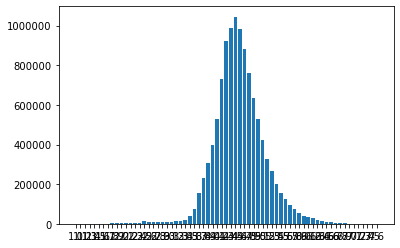

In [2]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'whole_genome_sequencing'])
sample_pair_types.append(['applied_reference_genome', 'whole_genome_sequencing'])
sample_pair_types.append(['whole_genome_sequencing', 'applied_reference_genome'])
sample_pair_types.append(['applied_reference_genome', 'applied_reference_genome'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)

### gbs similarities

general similarity length : mean = 134.5 Kb, median = 47.7 Kb
ibd similarity length : mean = 371.2 Kb, median = 90.9 Kb


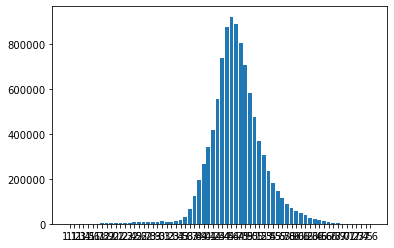

In [3]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'genotyping_by_sequencing'])
sample_pair_types.append(['applied_reference_genome', 'genotyping_by_sequencing'])
sample_pair_types.append(['genotyping_by_sequencing', 'whole_genome_sequencing'])
sample_pair_types.append(['genotyping_by_sequencing', 'applied_reference_genome'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)

### snp similarities

general similarity length : mean = 7266.3 Kb, median = 1091.8 Kb
ibd similarity length : mean = 7266.3 Kb, median = 1091.8 Kb


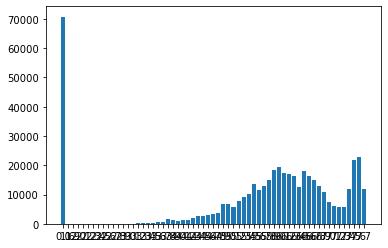

In [4]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'snp_marker'])
sample_pair_types.append(['applied_reference_genome', 'snp_marker'])
sample_pair_types.append(['snp_marker', 'whole_genome_sequencing'])
sample_pair_types.append(['snp_marker', 'applied_reference_genome'])
sample_pair_types.append(['snp_marker', 'snp_marker'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)